In [1]:
import pandas as pd
import numpy as np
import prince
import matplotlib.pyplot as plt
import plot
import matplotlib as mpl
from sklearn import base
from sklearn import preprocessing
from sklearn import utils

In [2]:
pca = prince.PCA(
     n_components=2,
     n_iter=3,
     rescale_with_mean=True,
     rescale_with_std=True,
     copy=True,
     check_input=True,
     engine='sklearn',
     random_state=42
     )

In [3]:
def raccourcis(df):
    df_res = df.copy()
    shorter_index, list_date = [], []
    for elem in df_res.index:
        index, date = shorted_author(elem)
        shorter_index.append(index)
        list_date.append(date)
    df_res.index = shorter_index
    df_res['date'] = list_date
    return df_res

In [4]:
def shorted_str(string):
    date = int(string[:4])
    shorter_str = string[:4]
    conteur = 0
    for i in range(1, len(string)):
        if string[i]=='_':
            conteur+=1
        
        if (string[i-1] == '_' or string[i-1] == '-') and conteur < 2:
            if string[i-1] == '_':
                shorter_str+=string[i-1]
            shorter_str+=string[i].upper()
            
    return shorter_str, date

In [5]:
def shorted_author(string):
    date = int(string[:4])
    title = string.split('_')[2]
    author = string[5]
            
    return str(date)+'_'+author+'_'+title, date

In [7]:
df_maupassant = pd.read_csv(r'../data/authors_features/Maupassant_features.csv')
df_maupassant.rename(columns = {'Unnamed: 0':'index'}, inplace = True)
df_maupassant.set_index("index", inplace = True)
df_maupassant = df_maupassant.replace(np.nan, 0)

In [8]:
df_colette = pd.read_csv(r'../data/authors_features/Colette_features.csv')
df_colette.rename(columns = {'Unnamed: 0':'index'}, inplace = True)
df_colette.set_index("index", inplace = True)
df_colette = df_colette.replace(np.nan, 0)

In [10]:
df_hugo = pd.read_csv(r'../data/authors_features/Hugo_features.csv')
df_hugo.rename(columns = {'Unnamed: 0':'index'}, inplace = True)
df_hugo.set_index("index", inplace = True)
df_hugo = df_hugo.replace(np.inf, 0).replace(np.nan, 0)

In [11]:
def plot_row_coordinates(self, X, ax=None, figsize=(6, 6), x_component=0, y_component=1,
                             labels=None, color_labels=None, ellipse_outline=False,
                             ellipse_fill=True, show_points=True, **kwargs):
        """Plot the row principal coordinates."""
        
        if ax is None:
            fig, ax = plt.subplots(figsize=figsize)

        # Add style
        ax = plot.stylize_axis(ax)

        # Make sure X is a DataFrame
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)

        # Retrieve principal coordinates
        coordinates = self.row_coordinates(X)
        x = coordinates[x_component].astype(float)
        y = coordinates[y_component].astype(float)

        # Plot
        if color_labels is None:
            ax.scatter(x, y, **kwargs)
        else:
            for color_label in sorted(list(set(color_labels))):
                mask = np.array(color_labels) == color_label
                color = ax._get_lines.get_next_color()
                # Plot points
                if show_points:
                    ax.scatter(x[mask], y[mask], color=color, **kwargs, label=color_label)
                # Plot ellipse
                if (ellipse_outline or ellipse_fill):
                    x_mean, y_mean, width, height, angle = plot.build_ellipse(x[mask], y[mask])
                    ax.add_patch(mpl.patches.Ellipse(
                        (x_mean, y_mean),
                        width,
                        height,
                        angle=angle,
                        linewidth=2 if ellipse_outline else 0,
                        color=color,
                        fill=ellipse_fill,
                        alpha=0.2 + (0.3 if not show_points else 0) if ellipse_fill else 1
                    ))

        # Add labels
        if labels is not None:
            for xi, yi, label in zip(x, y, labels):
                ax.annotate(label, (xi, yi), size=12)

        # Legend
        ax.legend()

        # Text
        ax.set_title('Row principal coordinates')
        ei = self.percentage_of_variance_
        ax.set_xlabel('Component {} ({:.2f}% inertia)'.format(x_component, ei[x_component]))
        ax.set_ylabel('Component {} ({:.2f}% inertia)'.format(y_component, ei[y_component]))

        return ax

In [12]:
def get_png(df_main):
    df_courant = raccourcis(df_main)

    titre = df_courant.index
    X = df_courant.iloc[:,:100]
    y = df_courant['canon']
    
    pca = prince.PCA(
     n_components=2,
     n_iter=3,
     rescale_with_mean=True,
     rescale_with_std=True,
     copy=True,
     check_input=True,
     engine='sklearn',
     random_state=42
     )
    
    pca = pca.fit(X)
    X["canon"] = y
    X["titre"] = X.index
    X.set_index(['titre', 'canon'], inplace=True)
    
    ax = plot_row_coordinates(pca,
     X,
     ax=None,
     figsize=(12, 12),
     x_component=0,
     y_component=1,
     labels=titre,
     color_labels=y,
     ellipse_outline=True,
     ellipse_fill=True,
     show_points=True
     )
    return ax

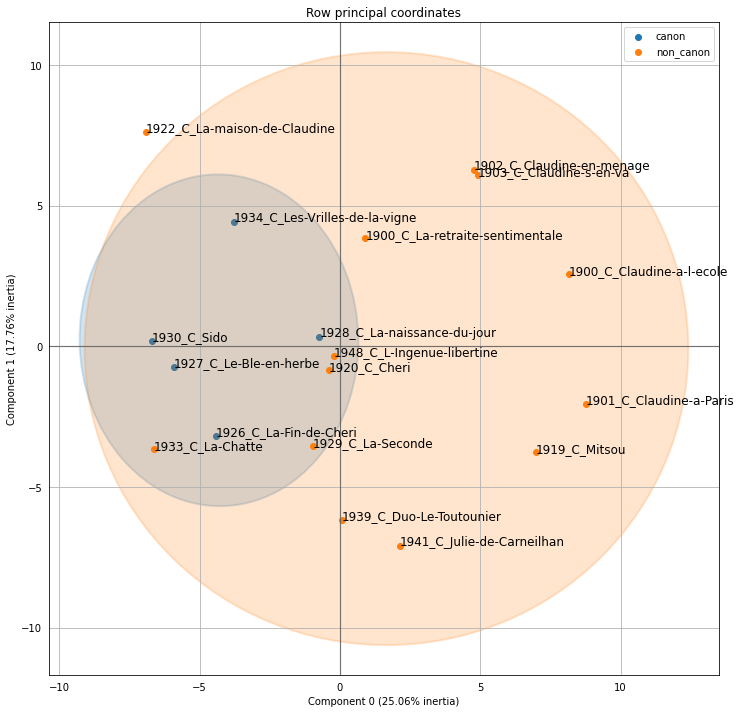

In [13]:
ax_C = get_png(df_colette)

In [47]:
ax_C.get_figure().savefig('../img/pca_colette.png', format='png', bbox_inches='tight', dpi=400)

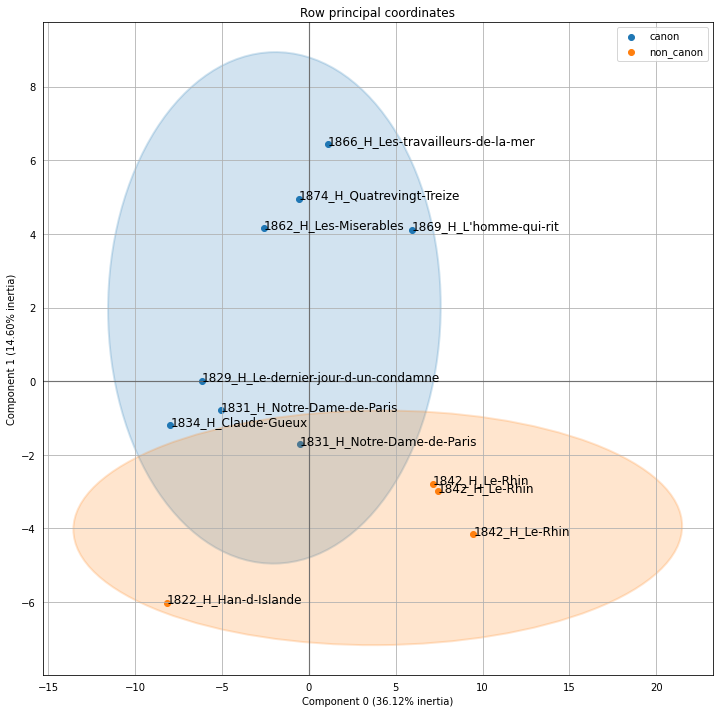

In [14]:
ax_H = get_png(df_hugo)

In [52]:
ax_H.get_figure().savefig('../img/pca_hugo.png', format='png', bbox_inches='tight', dpi=400)

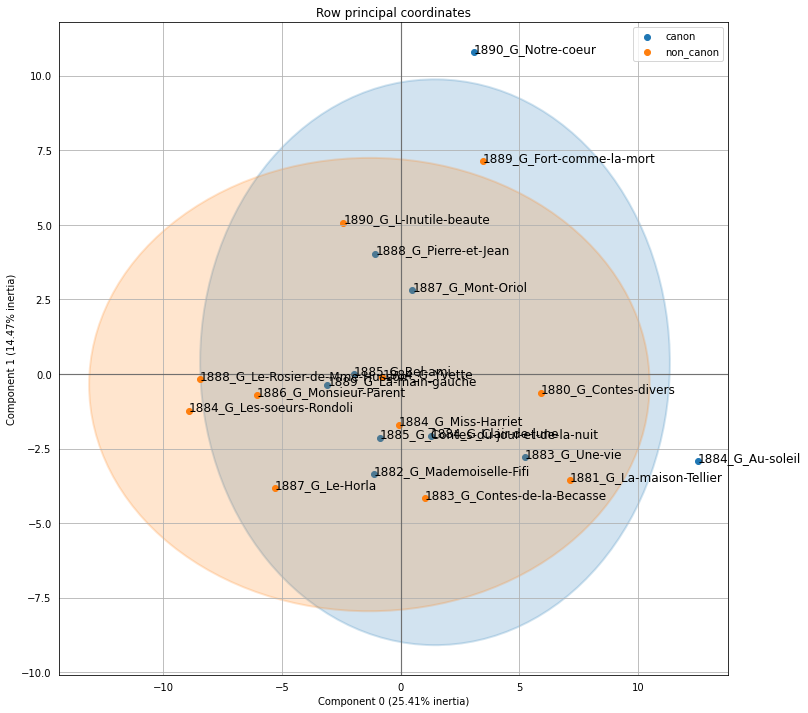

In [15]:
ax_M = get_png(df_maupassant)

In [54]:
ax_M.get_figure().savefig('../img/pca_maupassant.png', format='png', bbox_inches='tight', dpi=400)